# Maana Q: Knowledge and Reasoning Platform

## Installation

In [17]:
using Pkg
Pkg.activate(mktempdir())

Pkg.add("Catlab")
using Catlab.GAT
using Catlab.Theories
using Catlab.Present	
using Catlab.Programs	
using Catlab.WiringDiagrams
using Catlab.Graphics

Pkg.add("TikzPictures")
using TikzPictures

Pkg.add("TikzGraphs")
using TikzGraphs

Pkg.add("LightGraphs")
using LightGraphs

Pkg.add("Convex") 
import Convex

Pkg.add("SCS")
import SCS


 Activating new environment at `/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_anBgTg/Project.toml`
  Resolving package versions...
Updating `/private/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_anBgTg/Project.toml`
  [134e5e36] + Catlab v0.9.1
Updating `/private/var/folders/sg/1_7xybtx76j654qjl99l92ph0000gq/T/jl_anBgTg/Manifest.toml`
  [79e6a3ab] + Adapt v2.3.0
  [ec485272] + ArnoldiMethod v0.0.4
  [56f22d72] + Artifacts v1.3.0
  [15f4f7f2] + AutoHashEquals v0.2.0
  [a603d957] + CanonicalTraits v0.2.3
  [134e5e36] + Catlab v0.9.1
  [944b1d66] + CodecZlib v0.7.0
  [3da002f7] + ColorTypes v0.10.9
  [5ae59095] + Colors v0.12.4
  [34da2185] + Compat v3.20.0
  [a81c6b42] + Compose v0.9.1
  [a8cc5b0e] + Crayons v4.0.4
  [9a962f9c] + DataAPI v1.3.0
  [864edb3b] + DataStructures v0.18.7
  [e2d170a0] + DataValueInterfaces v1.0.0
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.1
  [069b7b12] + FunctionWrappers v1.1.1
  [6b9d7cbe] + GeneralizedGenerated v0.2.7


## Applied Category Theory using GATs

### Two views on category theory and software [^Patterson1]

1. Designing with categories: CT informing the design, architecture, and implementation of computer programs, in any domain.

**Slogan**: *Design patterns, but better*

2. Computing on categories: data structures and algorithms for computing with objects and morphisms in categories.

**Slogan**: *Computer algebra of categories* or *computational category theory*

**These are orthogonal [and can be layered].**

!!! tip
	This notebook is about how to use Q for computational category theory (mostly).

[^Patterson1]: [Evan Patterson: Realizing Applied Category Theory in Julia](https://www.youtube.com/watch?v=7dmrDYQh4rc)

### Representing morphisms in monoidal categories

Transforming between different **computational representations** of morphisms in symmetric monoidal categories.

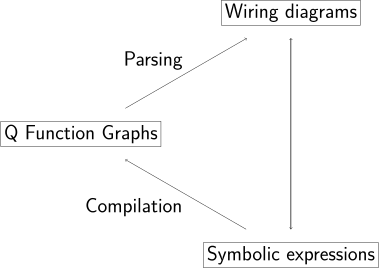

In [16]:
g = DiGraph(3)
add_edge!(g, 1, 2)
add_edge!(g, 2, 1)
add_edge!(g, 2, 3)
add_edge!(g, 3, 1)
TikzGraphs.plot(g, node_style="draw", options="scale=2, font=\\huge\\sf", TikzGraphs.Layouts.SpringElectrical(charge=25,dist=35), ["Wiring diagrams", "Symbolic expressions", "Q Function Graphs"], edge_labels=Dict((2,3)=>"Compilation", (3,1)=>"Parsing"))

## Theories and Signatures

An algebraic structure consists of 3 things:

1. **Sorts**: what "sort" of things is it about
1. **Operations**: what "actions" can be taken on the sorts
1. **Equations**: what "laws" must hold for the use of the operations on the sorts

A **signature** is the pairing of sorts and operations.  A **theory** is a pairing of the signature and the equations.

In [20]:
module Sandox
export dom, codom, id, compose

using Catlab

@signature Category(Ob,Hom) begin
    Ob::TYPE
    Hom(dom::Ob,codom::Ob)::TYPE

    id(A::Ob)::Hom(A,A)
    compose(f::Hom(A,B),g::Hom(B,C))::Hom(A,C) <= (A::Ob,B::Ob,C::Ob)
end

end

Main.Sandox

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-signature.png)

## Theory: `Category`

* **Service URI**: `/maana-cat-category`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-theory.png)

### Equation: `isAssociative`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-is-associative.png)

### Equation: `isUnital`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-is-unital.png)

## Theory: `Monoid`

* **Service URI**: `/maana-cat-monoid`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-theory.png)

### Equation: `isAssociative`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-is-associative.png)

### Equation: `isUnital`

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-is-unital.png)

## Algebraic Theory Instances

### Smart CRUD

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-smart-crud.png)

### Graph*i*QL

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/algebraic-instance-graphiql.png)

### GraphQL

```graphql
mutation persist($theorys: [TheoryAsInput]) {
  persistTheorys(theorys: $theorys)
}

fragment theoryFields on Theory {
  id
  signature {
    ...signatureFields
  }
  equations {
    ...equationFields
  }
}

fragment signatureFields on Signature {
  id
  sorts {
    id
  }
  operations {
    id
  }
}

fragment equationFields on Equation {
  id
}

query get {
  allTheorys {
    ...theoryFields
  }
}
```

### JSON

```json
{"theorys":[{
    "id": "/maana-cat-monoid", 
    "signature": {
      "id": "/maana-cat-monoid", 
      "sorts": [
        {"id": "/maana-cat-monoid/kind/M"}
      ], 
      "operations": [
        {"id": "/maana-cat-monoid/fn/e"},
        {"id": "/maana-cat-monoid/fn/m"}
      ]},
    "equations": [
      {"id": "/maana-cat-monoid/fn/isAssociative"},
      {"id": "/maana-cat-monoid/fn/isUnital"},
      {"id": "/maana-cat-monoid/fn/isEqual"}
    ]
},{
    "id": "/maana-cat-category", 
    "signature": {
      "id": "/maana-cat-category", 
      "sorts": [
        {"id": "/maana-cat-category/kind/Ob"},
        {"id": "/maana-cat-category/kind/Hom"}
      ], 
      "operations": [
        {"id": "/maana-cat-category/fn/id"},
        {"id": "/maana-cat-category/fn/compose"},
        {"id": "/maana-cat-category/fn/apply"}
      ]},
    "equations": [
      {"id": "/maana-cat-category/fn/isAssociative"},
      {"id": "/maana-cat-category/fn/isUnital"},
      {"id": "/maana-cat-category/fn/isEqual"}
    ]
}]}
```

### Theory DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/theory-dataview.png)

### Signature DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/signature-dataview.png)

### Equation DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/equation-dataview.png)

### Sort DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/sort-dataview.png)

### Operation DataView

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/operation-dataview.png)

## Signatures Define Instances

To operate within a theory means to construct (or generate) *instances*.  These theories provide *stub* functions that you must implement in a context-appropriate way.  These stub functions are provided as **workspace templates** that you *clone* to then provide your logic.

### Workspace Templates

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/monoid-template.png)

![](https://raw.githubusercontent.com/mu-ziq/CatML.jl/wip/docs/gh-deploy/dist/images/maana-q-gats/category-template.png)

### Instance: Category of Matrices

Instance of `Category` with *(element type, dimension)* pairs as objects and *matrices* as morphisms.

In [32]:
using Catlab.GAT
import Catlab.Theories: Ob, Hom, dom, codom, compose, ⋅, ∘, id
using LinearAlgebra: I

struct MatrixDom
  eltype::Type
  dim::Int
end

@instance Category{MatrixDom, Matrix} begin
  dom(M::Matrix) = MatrixDom(eltype(M), size(M,1))
  codom(M::Matrix) = MatrixDoma(eltype(M), size(M,2))

  id(m::MatrixDom) = Matrix{m.eltype}(I, m.dim, m.dim)
  compose(M::Matrix, N::Matrix) = M*N
end

In [34]:
M = [0 1;-1 0]

2×2 Array{Int64,2}:
  0  1
 -1  0

In [35]:
compose(M,M)

2×2 Array{Int64,2}:
 -1   0
  0  -1

In [36]:
id(dom(M))

2×2 Array{Int64,2}:
 1  0
 0  1

In [48]:
size(M,2)

2

## Signatures Define Symbolic Expressions